In [1]:
'''authority'''
#__author__ = "Agung Setiyono"
#__copyright__ = "Date created : January 2021"
#__email__ = "agung.setyoyono@gmail.com"

#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


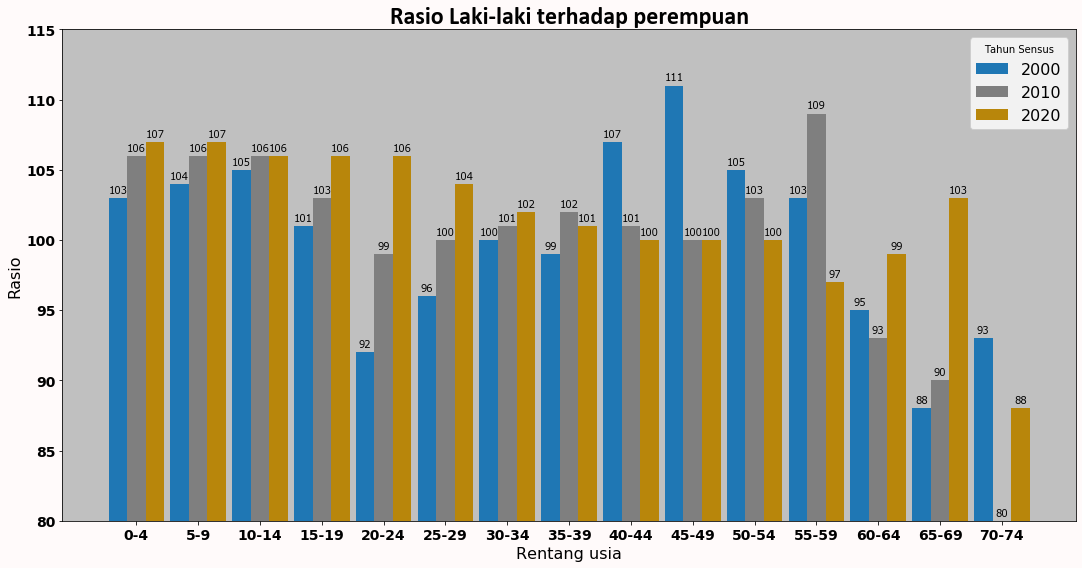

In [2]:
data = pd.read_csv('rasioLP.csv')
labels = data.umur

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('snow')
ax.set_facecolor("silver")
rects1 = ax.bar(x - width, data.rasio_2000, width, label='2000')
rects2 = ax.bar(x, data.rasio_2010, width, label='2010', color = "tab:gray")
rects3 = ax.bar(x + width, data.rasio_2020, width, label='2020', color="darkgoldenrod")

csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Verdana'}
# Some text for labels, title and custom x-axis tick label
ax.set_ylabel('Rasio', fontsize=16)
ax.set_xlabel('Rentang usia', fontsize=16)
ax.set_ylim((80, 115))
ax.set_title('Rasio Laki-laki terhadap perempuan', **csfont, fontsize=24, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14, fontweight='bold')
ax.legend(fontsize=16, title='Tahun Sensus')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', **hfont)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.yticks(fontsize=14, fontweight='bold')
plt.show()

In [3]:
# data anak kelahiran 90-an
genZ = np.array([data.rasio_2000[0], data.rasio_2010[2], data.rasio_2020[4]])
genY = np.array([data.rasio_2000[1], data.rasio_2010[3], data.rasio_2020[5]])
genX = np.array([data.rasio_2000[2], data.rasio_2010[2], data.rasio_2020[4]])

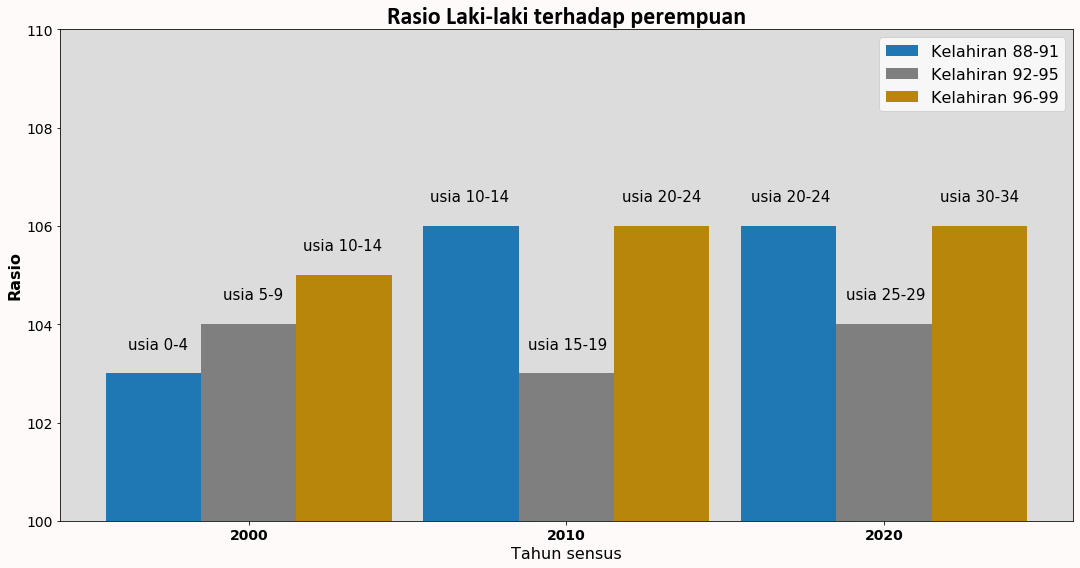

In [4]:
labels = np.array([2000, 2010, 2020])

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, az = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('snow')
az.set_facecolor("gainsboro")
rects4 = az.bar(x - width, genZ, width, label='Kelahiran 88-91')
rects5 = az.bar(x, genY, width, label='Kelahiran 92-95', color = "tab:gray")
rects6 = az.bar(x + width, genX, width, label='Kelahiran 96-99', color="darkgoldenrod")

# Add some text for labels, title and custom x-axis tick labels, etc.
az.set_ylabel('Rasio', fontsize=16, fontweight='bold')
az.set_xlabel('Tahun sensus', fontsize=16)
az.set_ylim((100, 110))
az.set_title('Rasio Laki-laki terhadap perempuan', **csfont, fontsize=24, fontweight='bold')
az.set_xticks(x)
az.set_xticklabels(labels, fontsize=14, fontweight='bold')
#ax.set_yticklabels(fontsize=14, fontweight='bold')
az.legend(fontsize=16)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', **hfont)


autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

az.text(-0.08,104.5, 'usia 5-9',rotation= 0, fontsize=15)
az.text(-0.38,103.5, 'usia 0-4',rotation= 0, fontsize=15)
az.text(0.17,105.5, 'usia 10-14',rotation= 0, fontsize=15)

az.text(.88,103.5, 'usia 15-19',rotation= 0, fontsize=15)
az.text(.57,106.5, 'usia 10-14',rotation= 0, fontsize=15)
az.text(1.175,106.5, 'usia 20-24',rotation= 0, fontsize=15)

az.text(1.88,104.5, 'usia 25-29',rotation= 0, fontsize=15)
az.text(1.58,106.5, 'usia 20-24',rotation= 0, fontsize=15)
az.text(2.175,106.5, 'usia 30-34',rotation= 0, fontsize=15)

fig.tight_layout()
plt.yticks(fontsize=14)
plt.show()

In [5]:
growth = pd.read_csv('perkembangan_rasio.csv')
#tahun = growth.tahun

In [6]:
model = LinearRegression()
x = np.array(growth.tahun).reshape((-1, 1))
y = np.array(growth.rasio).reshape((-1, 1))

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9185256693234221


In [7]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
print('slope',model.coef_[0][0]*10)

predicted response:
[[ 97.52915238]
 [ 98.38726115]
 [ 99.34071534]
 [100.29416952]
 [101.24762371]
 [102.2010779 ]]
slope 0.9534541891229789


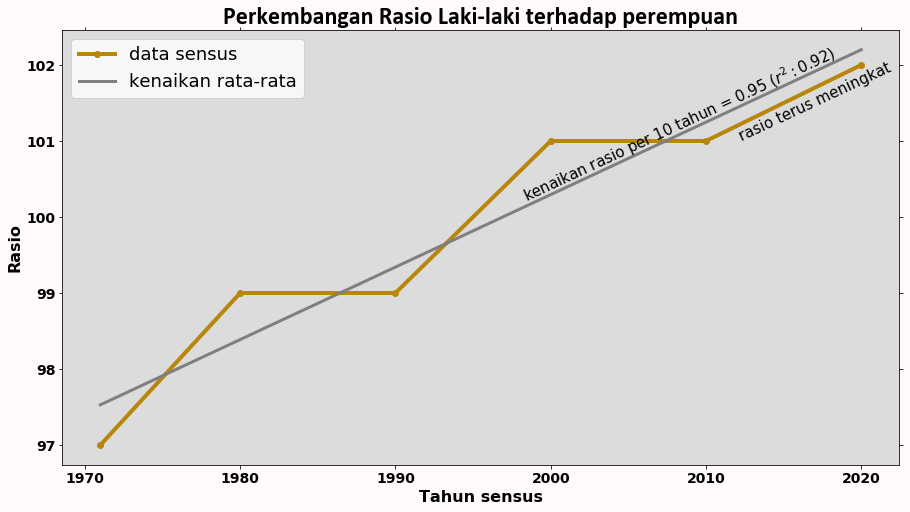

In [8]:
fig, ay = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('snow')
ay.set_facecolor("gainsboro")
ay.plot(growth.tahun, growth.rasio,'-o', color="darkgoldenrod", label='data sensus', linewidth=4)
ay.plot(growth.tahun, y_pred,'-', color="tab:gray", label='kenaikan rata-rata', linewidth=3)
ay.text(2012, 101, 'rasio terus meningkat',rotation= 25, fontsize=15)  
ay.text(1998, 100.2, 'kenaikan rasio per 10 tahun = '+ str(round(model.coef_[0][0]*10,2))
        +' ($r^2 :$'+str(round(r_sq,2))+')',rotation= 25, fontsize=15)

hfont = {'fontname':'Verdana'}
# Add some text for labels, title and custom x-axis tick labels, etc.
ay.set_ylabel('Rasio', fontsize=16, fontweight='bold')
ay.set_xlabel('Tahun sensus', fontsize=16, fontweight='bold')
#ay.set_ylim((80, 115))
ay.set_title('Perkembangan Rasio Laki-laki terhadap perempuan', **csfont, fontsize=24, fontweight='bold')

#tahun = growth.tahun
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.xticks(fontsize=14,  fontweight='bold')
plt.yticks(fontsize=14,  fontweight='bold')
plt.legend(fontsize=18)
plt.show()

In [9]:
perpro = pd.read_csv('perpro.csv')

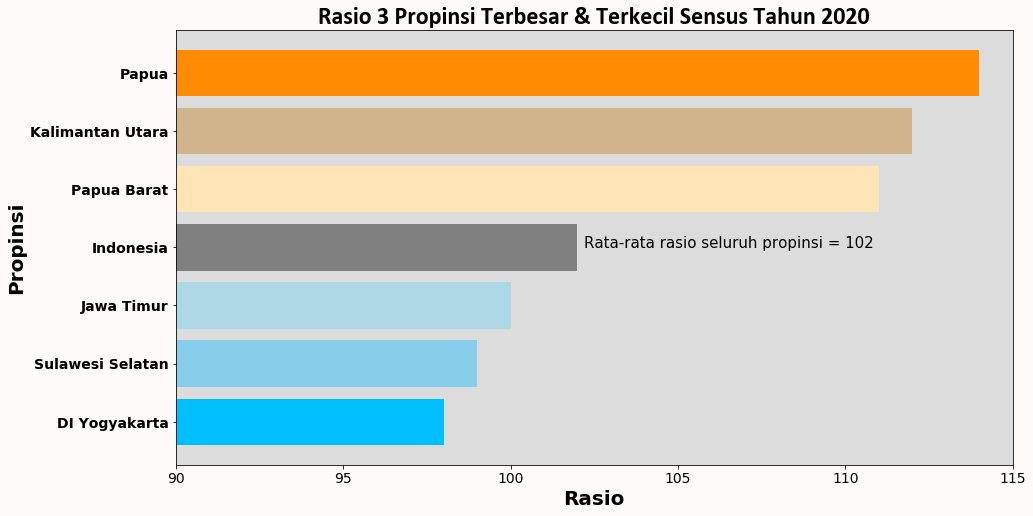

In [145]:
fig, aq = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('snow')
aq.set_facecolor("gainsboro")
#color for bar
col = np.array(['deepskyblue', 'skyblue', 'lightblue', 'gray', 'moccasin', 'tan','darkorange' ])
for i in range(7):
    aq.barh(perpro.prop[i],perpro.rasio[i], color=col[i])
aq.set_xlim((90, 115))


# Add some text for labels, title and custom x-axis tick labels, etc.
aq.set_ylabel('Propinsi', fontsize=20, fontweight='bold')
aq.set_xlabel('Rasio', fontsize=20, fontweight='bold')
#ay.set_ylim((80, 115))
aq.set_title('Rasio 3 Propinsi Terbesar & Terkecil Sensus Tahun 2020', **csfont, fontsize=24, fontweight='bold')

aq.text(102.2,3, 'Rata-rata rasio seluruh propinsi = 102',rotation= 0, fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14,  fontweight='bold')
plt.show()